# <center> Patients Suffering from Heart Failure</center>
![Heart Failure!](https://nurseslabs.com/wp-content/uploads/2016/09/FT-Heart-Failure-1.png)

Introduction:

In this project we will Analyze the 

TODO - Write some introduction about your project here: describe the dataset, where you got it from, what you're trying to do with it, and which tools & techniques you're using. You can also mention about the course [Data Analysis with Python: Zero to Pandas](zerotopandas.com), and what you've learned from it.

## Downloading the Dataset

Lets import some important libraries 

In [1]:
!pip install jovian --upgrade --q

In [2]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [3]:
import urllib.request

urllib.request.urlretrieve('https://raw.githubusercontent.com/lafirm/datasets/main/heart_failure_clinical_records_dataset.csv','heart')

('heart', <http.client.HTTPMessage at 0x7f5d503ad6d0>)

Let us save and upload our work to Jovian before continuing.

In [4]:
!pip install jovian --upgrade -q

In [5]:
import jovian

In [6]:
jovian.commit(project='project')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilgawate111/project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilgawate111/project


'https://jovian.ai/nikhilgawate111/project'

## Data Preparation and Cleaning

**TODO** - Write some explanation here.



> Instructions (delete this cell):
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

Lets import the most essential library which will help us to perform analysis 

In [7]:
import numpy as np
import pandas as pd

In [8]:
#Importing File
heart_raw = pd.read_csv('heart')

#Lets keep a copy to for any references 
heart_copy = heart_raw.copy()

In [9]:
#Lets see the data 
heart_raw

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [10]:
#Lets check the datatypes 
heart_raw.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [11]:
#Lets start cleaning and staging the data for future analysis 

heart_raw.rename(columns = {'DEATH_EVENT':'Patient_dead'},inplace = True)
heart_raw['age']=heart_raw['age'].astype(int)
heart_raw[['anaemia','diabetes','high_blood_pressure','smoking','Patient_dead']]=heart_raw[['anaemia','diabetes',
                                                                                            'high_blood_pressure',
                                                                                            'smoking',
                                                                                            'Patient_dead']].astype(bool)
heart_raw['sex'] = np.where(heart_raw['sex']==1, 'Male','Female')
heart_raw['platelets']=(heart_raw['platelets']/1000).astype(int)

In [12]:
#Lets look at the new df
heart_raw.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,4,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,6,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,7,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,7,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,8,True


In [13]:
#lets check the datatypes of new df
heart_raw.dtypes

age                           int64
anaemia                        bool
creatinine_phosphokinase      int64
diabetes                       bool
ejection_fraction             int64
high_blood_pressure            bool
platelets                     int64
serum_creatinine            float64
serum_sodium                  int64
sex                          object
smoking                        bool
time                          int64
Patient_dead                   bool
dtype: object

In [14]:
#Lets check for any null values
heart_raw.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
Patient_dead                False
dtype: bool

As the values are false it means there are no null values

In [15]:
# Another way to check
heart_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    int64  
 1   anaemia                   299 non-null    bool   
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    bool   
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    bool   
 6   platelets                 299 non-null    int64  
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    object 
 10  smoking                   299 non-null    bool   
 11  time                      299 non-null    int64  
 12  Patient_dead              299 non-null    bool   
dtypes: bool(5), float64(1), int64(6), object(1)
memory usage: 20.3+ K

In [16]:
#Lets check some basics statistics of the given df
heart_raw.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,581.839465,38.083612,263.327759,1.39388,136.625418,130.260870
std,11.894997,970.287881,11.834841,97.805105,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212.500000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303.500000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850.000000,9.40000,148.000000,285.000000


From the above table it is clear that the max age is 95 and min is 40 that is quite seen in a heart failure patient, though the creatinine phosphokinase (CSK) is too high = 7861 which is impossible. The range of CSK is between 23 - 600 if we consider maximum. Lets change it!

In [17]:
heart_raw[heart_raw['creatinine_phosphokinase'].between(23,600)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,4,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,7,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,7,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,8,True
5,90,True,47,False,40,True,204,2.1,132,Male,True,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
291,60,False,320,False,35,False,133,1.4,139,Male,False,258,False
292,52,False,190,True,38,False,382,1.0,140,Male,True,258,False
293,63,True,103,True,35,False,179,0.9,136,Male,True,270,False
294,62,False,61,True,38,True,155,1.1,143,Male,True,270,False


In [18]:
heart_raw.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
count,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000
mean,60.829431,581.839465,38.083612,263.327759,1.39388,136.625418,130.260870
std,11.894997,970.287881,11.834841,97.805105,1.03451,4.412477,77.614208
min,40.000000,23.000000,14.000000,25.000000,0.50000,113.000000,4.000000
25%,51.000000,116.500000,30.000000,212.500000,0.90000,134.000000,73.000000
50%,60.000000,250.000000,38.000000,262.000000,1.10000,137.000000,115.000000
75%,70.000000,582.000000,45.000000,303.500000,1.40000,140.000000,203.000000
max,95.000000,7861.000000,80.000000,850.000000,9.40000,148.000000,285.000000


That's Look Perfect!

The above df needs to have more data to do exploratory analysis. Lets import an HTML file using pandas 

In [19]:
data = pd.read_html('https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5/tables/1')[0]

In [20]:
data
#Droping unneccesary rows and columns 

data = data.drop([3,4,7,13],axis=0)



In [21]:
data


,Feature,Explanation,Measurement,Range
0,Age,Age of the patient,Years,"[40,..., 95]"
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean,"0, 1"
2,High blood pressure,If a patient has hypertension,Boolean,"0, 1"
5,Diabetes,If the patient has diabetes,Boolean,"0, 1"
6,Ejection fraction,Percentage of blood leaving,Percentage,"[14,..., 80]"
8,Sex,Woman or man,Binary,"0, 1"
9,Platelets,Platelets in the blood,kiloplatelets/mL,"[25.01,..., 850.00]"
10,Serum creatinine,Level of creatinine in the blood,mg/dL,"[0.50,..., 9.40]"
11,Serum sodium,Level of sodium in the blood,mEq/L,"[114,..., 148]"
12,Smoking,If the patient smokes,Boolean,"0, 1"


In [22]:
data['Normal Value'] = ['None', 
                                     'None', 
                                     'None',
                                     'None',
                                     '55% - 70%',
                        'None',
                                     
                        '150 - 400 kilo-platelets' ,
                                     '0.6 - 1.2 mg/dL', 
                                     '135 - 145 mEq /L', 
                                     'None', 'None'
                                    ] 

In [23]:
data = data.drop(columns=['Range'])

In [24]:
data

,Feature,Explanation,Measurement,Normal Value
0,Age,Age of the patient,Years,None
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean,None
2,High blood pressure,If a patient has hypertension,Boolean,None
5,Diabetes,If the patient has diabetes,Boolean,None
6,Ejection fraction,Percentage of blood leaving,Percentage,55% - 70%
8,Sex,Woman or man,Binary,None
9,Platelets,Platelets in the blood,kiloplatelets/mL,150 - 400 kilo-platelets
10,Serum creatinine,Level of creatinine in the blood,mg/dL,0.6 - 1.2 mg/dL
11,Serum sodium,Level of sodium in the blood,mEq/L,135 - 145 mEq /L
12,Smoking,If the patient smokes,Boolean,None


In [269]:
heart_raw

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
0,75,False,582,False,Abnormal,True,265,1.9,130,Male,False,4,True
1,55,False,7861,False,Abnormal,False,263,1.1,136,Male,False,6,True
2,65,False,146,False,Abnormal,False,162,1.3,129,Male,True,7,True
3,50,True,111,False,Abnormal,False,210,1.9,137,Male,False,7,True
4,65,True,160,True,Abnormal,False,327,2.7,116,Female,False,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,61,True,Abnormal,True,155,1.1,143,Male,True,270,False
295,55,False,1820,False,Abnormal,False,270,1.2,139,Female,False,271,False
296,45,False,2060,True,60,False,742,0.8,138,Female,False,278,False
297,45,False,2413,False,Abnormal,False,140,1.4,140,Male,True,280,False


In [26]:
heart.isnull().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
time                        False
Patient_dead                False
dtype: bool

In [27]:
data.isnull().any()

Feature         False
Explanation     False
Measurement     False
Normal Value    False
dtype: bool

## Some Information 

#### Number of Male and Female patients in the data

In [28]:
heart['sex'].value_counts()

Male      194
Female    105
Name: sex, dtype: int64

In [29]:
heart

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,4,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,6,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,7,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,7,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,61,True,38,True,155,1.1,143,Male,True,270,False
295,55,False,1820,False,38,False,270,1.2,139,Female,False,271,False
296,45,False,2060,True,60,False,742,0.8,138,Female,False,278,False
297,45,False,2413,False,38,False,140,1.4,140,Male,True,280,False


#### Number of Patients having Anameia 

In [30]:
heart['anaemia'].value_counts()

False    170
True     129
Name: anaemia, dtype: int64

There are 129 such patients 

#### Number of Patients having Diabetes

In [31]:
heart['diabetes'].value_counts()

False    174
True     125
Name: diabetes, dtype: int64

There are 125 diabetic patients 

In [32]:
heart['high_blood_pressure'].value_counts()

False    194
True     105
Name: high_blood_pressure, dtype: int64

There are total 105 patients that have a High BP

#### Number of patients who smoke

In [33]:
heart['smoking'].value_counts()

False    203
True      96
Name: smoking, dtype: int64

96 patients out of 299 smoke 

#### Number of Patients died in the follow up period 

In [34]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,4,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,6,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,7,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,7,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,8,True


In [35]:
data.head()

,Feature,Explanation,Measurement,Normal Value
0,Age,Age of the patient,Years,None
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean,None
2,High blood pressure,If a patient has hypertension,Boolean,None
5,Diabetes,If the patient has diabetes,Boolean,None
6,Ejection fraction,Percentage of blood leaving,Percentage,55% - 70%


In [36]:
heart.groupby(['Patient_dead','sex']).size().reset_index().pivot(columns='Patient_dead',index='sex',values = 0)

Patient_dead,False,True
sex,,
Female,71,34
Male,132,62


#### Number of Patients with Abnormal Ejection Fraction

In [37]:
heart[(heart['ejection_fraction']<55)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,4,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,6,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,7,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,7,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,63,True,103,True,35,False,179,0.9,136,Male,True,270,False
294,62,False,61,True,38,True,155,1.1,143,Male,True,270,False
295,55,False,1820,False,38,False,270,1.2,139,Female,False,271,False
297,45,False,2413,False,38,False,140,1.4,140,Male,True,280,False


There are total of 261 abnormal patients

#### Number of Patients with abnormal platelets counts 

In [38]:
data

,Feature,Explanation,Measurement,Normal Value
0,Age,Age of the patient,Years,None
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean,None
2,High blood pressure,If a patient has hypertension,Boolean,None
5,Diabetes,If the patient has diabetes,Boolean,None
6,Ejection fraction,Percentage of blood leaving,Percentage,55% - 70%
8,Sex,Woman or man,Binary,None
9,Platelets,Platelets in the blood,kiloplatelets/mL,150 - 400 kilo-platelets
10,Serum creatinine,Level of creatinine in the blood,mg/dL,0.6 - 1.2 mg/dL
11,Serum sodium,Level of sodium in the blood,mEq/L,135 - 145 mEq /L
12,Smoking,If the patient smokes,Boolean,None


In [39]:
heart['platelets'].unique()

array([265, 263, 162, 210, 327, 204, 127, 454, 388, 368, 253, 136, 276,
       427,  47, 262, 166, 237,  87, 297, 289, 149, 196, 284, 153, 200,
       360, 319, 302, 188, 228, 226, 321, 305, 329, 185, 218, 194, 310,
       271, 451, 140, 395, 418, 351, 255, 461, 223, 216, 254, 390, 385,
       119, 213, 274, 244, 497, 374, 122, 243, 266, 317, 283, 324, 293,
       172, 406, 173, 304, 235, 181, 249, 219, 318, 221, 298, 286, 621,
       850, 306, 252, 328, 164, 507, 203, 217, 300, 267, 227, 250, 295,
       231, 211, 348, 229, 338, 242, 225, 184, 277, 362, 174, 448,  75,
       334, 192, 220,  70, 270, 325, 176, 189, 281, 337, 105, 132, 279,
       303, 224, 389, 365, 201, 275, 350, 309, 260, 160, 126, 259,  73,
       377, 212, 186, 268, 147, 481, 290, 358, 151, 371, 130, 504, 141,
        62, 330, 248, 257, 533, 264, 282, 314, 246, 301, 404, 236, 294,
       233, 308, 198, 208, 133, 222, 215, 150, 422,  25, 232, 241,  51,
       336, 543, 382, 179, 155, 742])

In [40]:
heart.shape[0] - heart[heart['platelets'].between(150,400)].shape[0] 

47

There are 47 patients with abnormal platelets counts

In [41]:
heart[(heart['platelets']<150) | (heart['platelets']>400)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
6,75,True,246,False,15,False,127,1.20,137,Male,False,10,True
7,60,True,315,True,60,False,454,1.10,131,Male,True,10,True
12,45,True,981,False,30,False,136,1.10,137,Male,False,11,True
14,49,True,80,False,30,True,427,1.00,138,Female,False,12,False
15,82,True,379,False,50,False,47,1.30,136,Male,False,13,True
19,48,True,582,True,55,False,87,1.90,121,Female,False,15,True
25,80,False,148,True,38,False,149,1.90,144,Male,True,23,True
47,60,False,582,True,38,True,451,0.60,138,Male,True,40,True
48,80,True,553,False,20,True,140,4.40,133,Male,False,41,True
51,53,True,91,False,20,True,418,1.40,139,Female,False,43,True


#### Number of patients with abnormal sodium level

In [42]:
data

,Feature,Explanation,Measurement,Normal Value
0,Age,Age of the patient,Years,None
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean,None
2,High blood pressure,If a patient has hypertension,Boolean,None
5,Diabetes,If the patient has diabetes,Boolean,None
6,Ejection fraction,Percentage of blood leaving,Percentage,55% - 70%
8,Sex,Woman or man,Binary,None
9,Platelets,Platelets in the blood,kiloplatelets/mL,150 - 400 kilo-platelets
10,Serum creatinine,Level of creatinine in the blood,mg/dL,0.6 - 1.2 mg/dL
11,Serum sodium,Level of sodium in the blood,mEq/L,135 - 145 mEq /L
12,Smoking,If the patient smokes,Boolean,None


In [43]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,4,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,6,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,7,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,7,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,8,True


In [44]:
heart[(heart['serum_sodium']<135) | (heart['serum_sodium']>145)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,4,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,7,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,8,True
5,90,True,47,False,40,True,204,2.1,132,Male,True,8,True
7,60,True,315,True,60,False,454,1.1,131,Male,True,10,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
270,44,False,582,True,30,True,263,1.6,130,Male,True,244,False
271,51,False,582,True,40,False,221,0.9,134,Female,False,244,False
272,67,False,213,False,38,False,215,1.2,133,Female,False,245,False
282,42,False,64,False,30,False,215,3.8,128,Male,True,250,False


There are 85 patients with abnormal sodium level in the blood

#### Number of Patients with abnormal creatinine level in blood 

In [45]:
data

,Feature,Explanation,Measurement,Normal Value
0,Age,Age of the patient,Years,None
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean,None
2,High blood pressure,If a patient has hypertension,Boolean,None
5,Diabetes,If the patient has diabetes,Boolean,None
6,Ejection fraction,Percentage of blood leaving,Percentage,55% - 70%
8,Sex,Woman or man,Binary,None
9,Platelets,Platelets in the blood,kiloplatelets/mL,150 - 400 kilo-platelets
10,Serum creatinine,Level of creatinine in the blood,mg/dL,0.6 - 1.2 mg/dL
11,Serum sodium,Level of sodium in the blood,mEq/L,135 - 145 mEq /L
12,Smoking,If the patient smokes,Boolean,None


In [46]:
heart.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,4,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,6,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,7,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,7,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,8,True


In [47]:
heart[(heart['serum_creatinine']<0.6) | (heart['serum_creatinine']>1.2)]

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,4,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,7,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,7,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,8,True
5,90,True,47,False,40,True,204,2.1,132,Male,True,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,42,False,64,False,30,False,215,3.8,128,Male,True,250,False
286,60,False,253,False,35,False,279,1.7,140,Male,False,250,False
291,60,False,320,False,35,False,133,1.4,139,Male,False,258,False
297,45,False,2413,False,38,False,140,1.4,140,Male,True,280,False


There are total of 102 patients who has low creatinine levels

In [48]:
heart.sample(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
190,80,False,582,True,35,False,350,2.10,134,Male,False,174,False
278,50,True,1051,True,30,False,232,0.70,136,Female,False,246,False
109,45,False,292,True,35,False,850,1.30,142,Male,True,88,False
24,75,False,582,True,30,True,263,1.83,134,Female,False,23,True
262,65,True,258,True,25,False,198,1.40,129,Male,False,235,True
271,51,False,582,True,40,False,221,0.90,134,Female,False,244,False
127,58,True,200,True,60,False,300,0.80,137,Female,False,104,False
89,57,True,115,False,25,True,181,1.10,144,Male,False,79,False


In [49]:
import jovian

In [50]:
jovian.commit(project='project')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilgawate111/project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilgawate111/project


'https://jovian.ai/nikhilgawate111/project'

In [51]:
heart_raw

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,Patient_dead
0,75,False,582,False,20,True,265,1.9,130,Male,False,4,True
1,55,False,7861,False,38,False,263,1.1,136,Male,False,6,True
2,65,False,146,False,20,False,162,1.3,129,Male,True,7,True
3,50,True,111,False,20,False,210,1.9,137,Male,False,7,True
4,65,True,160,True,20,False,327,2.7,116,Female,False,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,False,61,True,38,True,155,1.1,143,Male,True,270,False
295,55,False,1820,False,38,False,270,1.2,139,Female,False,271,False
296,45,False,2060,True,60,False,742,0.8,138,Female,False,278,False
297,45,False,2413,False,38,False,140,1.4,140,Male,True,280,False


## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



> Instructions (delete this cell)
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

sns.set_style('whitegrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(9,5)
matplotlib.rcParams['figure.facecolor']='#00000000'

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

### Lets see the Number of patients affected by heart failure according to the age group

In [53]:
heart['age'].value_counts()

60    35
50    27
65    26
70    25
45    19
55    17
75    11
58    10
53    10
63     8
42     7
40     7
72     7
80     7
85     6
52     5
68     5
62     5
49     4
61     4
59     4
73     4
51     4
64     3
46     3
69     3
82     3
90     3
66     2
78     2
54     2
77     2
57     2
44     2
67     2
95     2
48     2
43     1
86     1
81     1
79     1
41     1
94     1
87     1
47     1
56     1
Name: age, dtype: int64

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

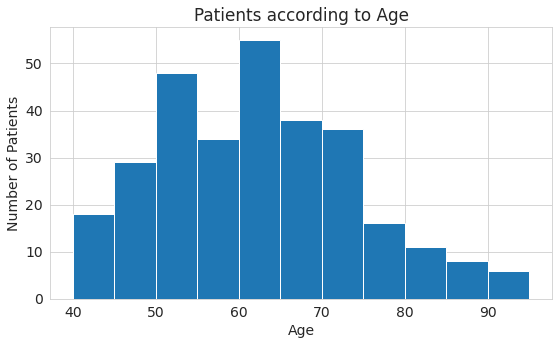

In [71]:
plt.hist(heart['age'],bins=np.arange(40,100,5),color = 'tab:blue')
plt.xlabel('Age')
plt.ylabel('Number of Patients')
plt.title('Patients according to Age');

The Age Group between 60 - 65 has maximum heart failure patients 

#### What Percentage of Male and Female are suffering from heart failure

In [122]:
heart['sex'].value_counts().index

Index(['Male', 'Female'], dtype='object')

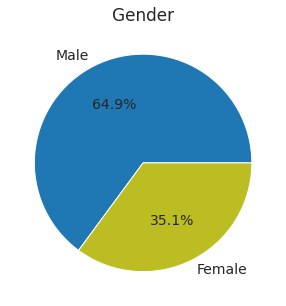

In [131]:
plt.pie(heart['sex'].value_counts(),labels = heart['sex'].value_counts().index,colors=['tab:blue','tab:olive'],
       autopct='%.1f%%');
plt.title('Gender');

There are around 64.9% males and 35.1% females suffering from heart attack

#### Death and Gender 

In [150]:
heart.groupby(['sex'],as_index=False)['Patient_dead'].count()

,sex,Patient_dead
0,Female,105
1,Male,194


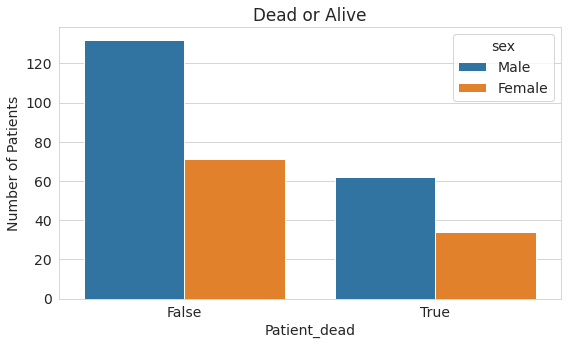

In [154]:
sns.countplot(x=heart['Patient_dead'],hue=heart['sex'])
plt.ylabel('Number of Patients')
plt.title('Dead or Alive');

Number of male patients died more than female

In [156]:
heart[(heart['Age']=50) & ]

,Feature,Explanation,Measurement,Normal Value
0,Age,Age of the patient,Years,None
1,Anaemia,Decrease of red blood cells or hemoglobin,Boolean,None
2,High blood pressure,If a patient has hypertension,Boolean,None
5,Diabetes,If the patient has diabetes,Boolean,None
6,Ejection fraction,Percentage of blood leaving,Percentage,55% - 70%
8,Sex,Woman or man,Binary,None
9,Platelets,Platelets in the blood,kiloplatelets/mL,150 - 400 kilo-platelets
10,Serum creatinine,Level of creatinine in the blood,mg/dL,0.6 - 1.2 mg/dL
11,Serum sodium,Level of sodium in the blood,mEq/L,135 - 145 mEq /L
12,Smoking,If the patient smokes,Boolean,None


In [323]:
heart['serum_creatinine'] = np.where((heart['serum_creatinine'].between(0.6,1.2)),'Normal','Abnormal')

In [328]:
heart['serum_sodium'] = np.where((heart['serum_sodium'].between(135,145)),'Normal','Abnormal')

In [315]:
jovian.commit(project='project')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilgawate111/project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilgawate111/project


'https://jovian.ai/nikhilgawate111/project'

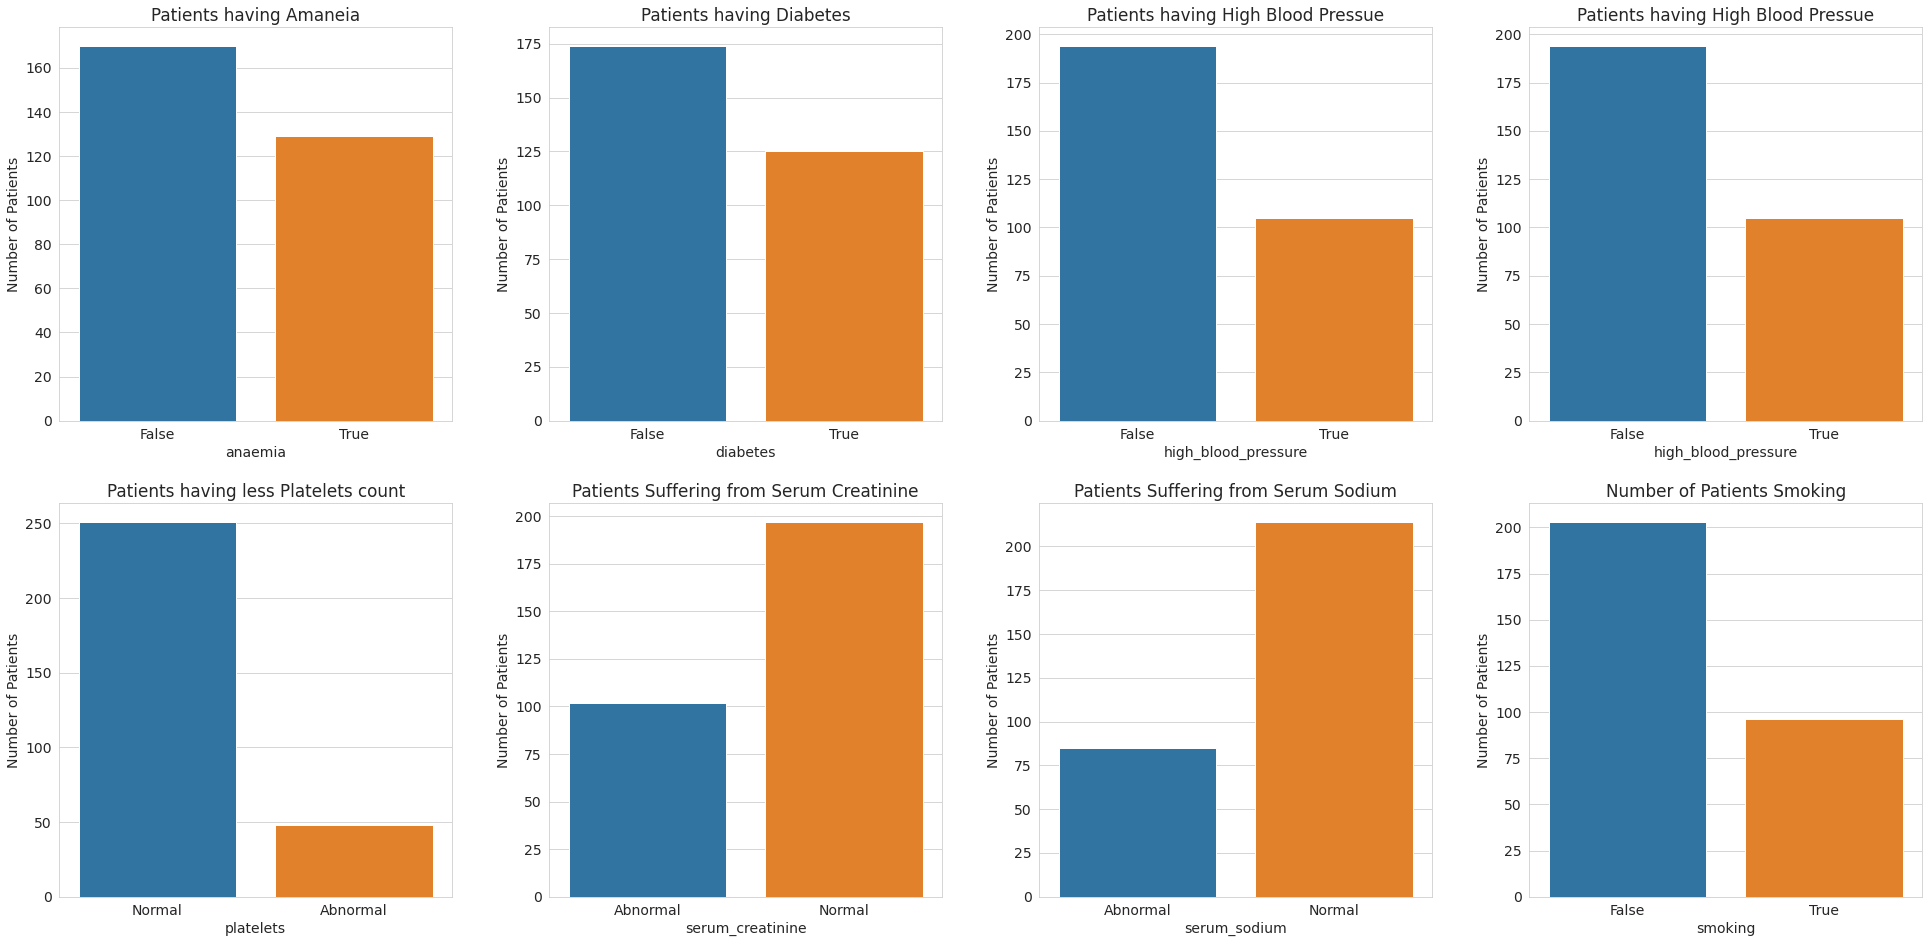

In [339]:
fig, axes = plt.subplots(2,4, figsize=(28,14))
plt.tight_layout(pad=4)

#For Amaneia
axes[0,0].set_title('Patients having Amaneia')
sns.countplot(x=heart['anaemia'],ax=axes[0,0])
axes[0,0].set_ylabel('Number of Patients')
#For Diabetes
axes[0,1].set_title('Patients having Diabetes')
sns.countplot(x=heart['diabetes'],ax=axes[0,1])
axes[0,1].set_ylabel('Number of Patients')
#For High blood pressure 
axes[0,2].set_title('Patients having High Blood Pressue')
sns.countplot(x=heart['high_blood_pressure'],ax=axes[0,2])
axes[0,2].set_ylabel('Number of Patients')
#For High blood pressure 
axes[0,3].set_title('Patients having High Blood Pressue')
sns.countplot(x=heart['high_blood_pressure'],ax=axes[0,3])
axes[0,3].set_ylabel('Number of Patients')
#For Platelets 
axes[1,0].set_title('Patients having less Platelets count')
sns.countplot(x=heart['platelets'],ax=axes[1,0])
axes[1,0].set_ylabel('Number of Patients')
#For Serum Creatinine
axes[1,1].set_title('Patients Suffering from Serum Creatinine')
sns.countplot(x=heart['serum_creatinine'],ax=axes[1,1])
axes[1,1].set_ylabel('Number of Patients')
#For Serum Sodium
axes[1,2].set_title('Patients Suffering from Serum Sodium')
sns.countplot(x=heart['serum_sodium'],ax=axes[1,2])
axes[1,2].set_ylabel('Number of Patients')
#For Smoking
axes[1,3].set_title('Number of Patients Smoking')
sns.countplot(x=heart['smoking'],ax=axes[1,3])
axes[1,3].set_ylabel('Number of Patients');

Lets see the numerical relationship with the data

In [341]:
#Seperate the data that only contains variables

variables = heart[['']]

In [344]:
new = pd.read_csv('heart')

In [348]:
new

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [351]:
new['diabetes'] = new['diabetes'].astype(bool)

In [355]:
variables = new[['age','ejection_fraction','platelets','serum_creatinine','serum_sodium']]

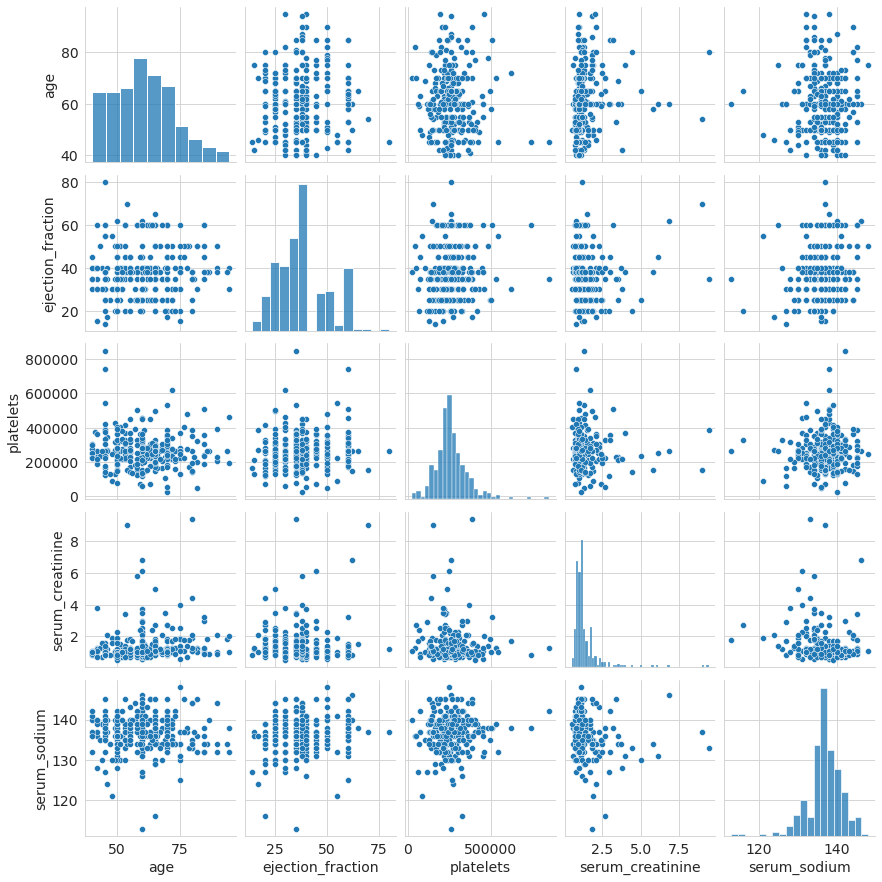

In [357]:
sns.pairplot(variables);

**TODO** - Explore one or more columns by plotting a graph below, and add some explanation about it

## Lets Identify whether the plots are normally distributed or not

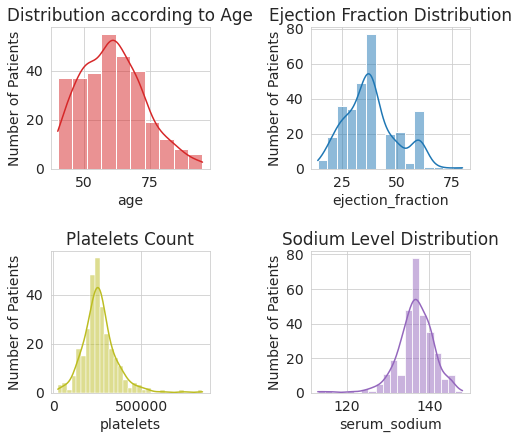

In [380]:
fig,axes=plt.subplots(2,2,figsize=(8,7))
plt.tight_layout(pad=4)

#For Age
axes[0,0].set_title('Distribution according to Age')
sns.histplot(x=new['age'], kde = True, color = 'tab:red',
            ax=axes[0,0]);
axes[0,0].set_ylabel('Number of Patients');

#For Ejection Fraction
axes[0,1].set_title('Ejection Fraction Distribution')
sns.histplot(x=new['ejection_fraction'],kde=True,
            ax=axes[0,1])
axes[0,1].set_ylabel('Number of Patients');

#For Platelets
axes[1,0].set_title('Platelets Count')
sns.histplot(new['platelets'],kde = True,
             color = 'tab:olive',
             ax=axes[1,0])
axes[1,0].set_ylabel('Number of Patients');

#For Sodium level
axes[1,1].set_title('Sodium Level Distribution')
sns.histplot(x=new['serum_sodium'],kde=True,color='tab:purple',
             ax=axes[1,1])
axes[1,1].set_ylabel('Number of Patients');

In [389]:
new.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,False,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,False,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,False,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,False,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,True,20,0,327000.00,2.7,116,0,0,8,1


In [394]:
new['sex'] = np.where((new['sex']==1),'Male','Female')

In [401]:
new['sex'].value_counts()

Male      194
Female    105
Name: sex, dtype: int64

In [420]:
smoker = new[new['smoking']=='Smoker']

In [423]:
smoker['sex'].value_counts()

Male      92
Female     4
Name: sex, dtype: int64

In [55]:
import jovian 

In [428]:
jovian.commit(project='project')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilgawate111/project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilgawate111/project


'https://jovian.ai/nikhilgawate111/project'

## Asking and Answering Questions

TODO - write some explanation here.



> Instructions (delete this cell)
>
> - Ask at least 5 interesting questions about your dataset
> - Answer the questions either by computing the results using Numpy/Pandas or by plotting graphs using Matplotlib/Seaborn
> - Create new columns, merge multiple dataset and perform grouping/aggregation wherever necessary
> - Wherever you're using a library function from Pandas/Numpy/Matplotlib etc. explain briefly what it does



#### Q1: TODO - ask a question here and answer it below

## Does Smoking affect the life of heart failure paitent

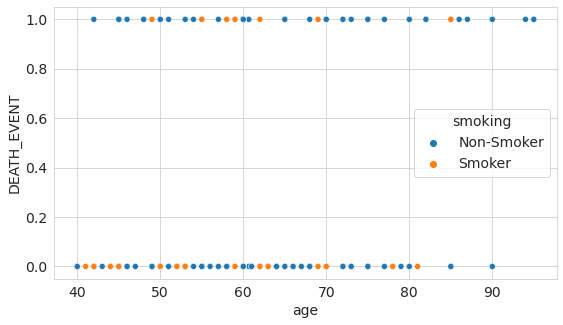

In [427]:
sns.scatterplot(x=new['age'],y=new['DEATH_EVENT'],hue=new['smoking']);

It does not impact the life

Let us save and upload our work to Jovian before continuing.

In [59]:
import jovian

In [60]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilgawate111/project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilgawate111/project


'https://jovian.ai/nikhilgawate111/project'

## Inferences and Conclusion

**TODO** - Write some explanation here: a summary of all the inferences drawn from the analysis, and any conclusions you may have drawn by answering various questions.

In [61]:
import jovian

In [62]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "nikhilgawate111/project" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/nikhilgawate111/project


'https://jovian.ai/nikhilgawate111/project'

## References and Future Work

**TODO** - Write some explanation here: ideas for future projects using this dataset, and links to resources you found useful.

> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

In [429]:
import jovian

In [ ]:
jovian.commit(project='project')

<IPython.core.display.Javascript object>